# Importing Dependencies


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Data Collection & Processing

In [10]:
pcos = pd.read_excel('PCOS_data_without_infertility.xlsx',sheet_name="Full_new")
pcos.head(15)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN
1,2.0,2.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN
2,3.0,3.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN
3,4.0,4.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN
4,5.0,5.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN
5,6.0,6.0,0.0,36.0,74.1,165.0,27.217631,15.0,78.0,28.0,...,0.0,0.0,110.0,70.0,9.0,6.0,16.0,20.0,8.0,NaN
6,7.0,7.0,0.0,34.0,64.0,156.0,26.298488,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,6.0,6.0,15.0,16.0,6.8,NaN
7,8.0,8.0,0.0,33.0,58.5,159.0,23.139907,13.0,72.0,20.0,...,0.0,0.0,120.0,80.0,7.0,6.0,15.0,18.0,7.1,NaN
8,9.0,9.0,0.0,32.0,40.0,158.0,16.023073,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,5.0,7.0,17.0,17.0,4.2,NaN
9,10.0,10.0,0.0,36.0,52.0,150.0,23.111111,15.0,80.0,20.0,...,0.0,0.0,110.0,80.0,1.0,1.0,14.0,17.0,2.5,NaN


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [12]:
df_noinf = pd.read_excel('PCOS_data_without_infertility.xlsx',sheet_name="Full_new")

# Feature Selection

In [19]:
corr_features=df_noinf.corrwith(df_noinf["PCOS (Y/N)"]).abs().sort_values(ascending=False)
corr_features=corr_features[corr_features>0.4].index
print(corr_features)

Index(['PCOS (Y/N)', 'Follicle No. (R)', 'Follicle No. (L)',
       'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)',
       'Cycle(R/I)'],
      dtype='object')


In [20]:
df_noinf=df_noinf[corr_features]
df_noinf.head()

,PCOS (Y/N),Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I)
0,0.0,3.0,3.0,0.0,0.0,0.0,2.0
1,0.0,5.0,3.0,0.0,0.0,0.0,2.0
2,1.0,15.0,13.0,0.0,0.0,0.0,2.0
3,0.0,2.0,2.0,0.0,0.0,0.0,2.0
4,0.0,4.0,3.0,0.0,0.0,0.0,2.0


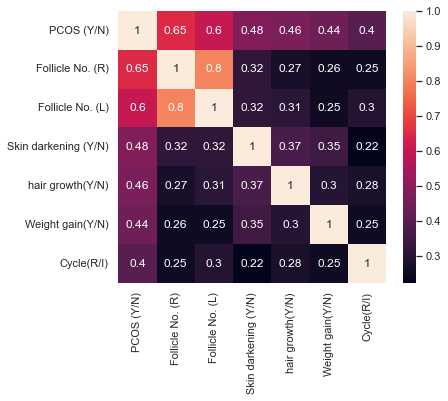

In [21]:
plt.figure(figsize=(6,5))
sns.heatmap(df_noinf.corr(), annot=True)
plt.show()

In [23]:
y=df_noinf['PCOS (Y/N)']
X=df_noinf.drop(['PCOS (Y/N)'], axis=1)

# Splitting Data

In [24]:
X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.2)

# Model Training

In [48]:
model=LogisticRegression(max_iter=100)
model.fit(X_train,y_train)
print(f"Score in Train Data : {model.score(X_train,y_train)}")

Score in Train Data : 0.9143518518518519


# Prediction

In [49]:
y_pred=model.predict(X_test)

# Results

In [50]:
test_data_accuracy= accuracy_score(y_test, y_pred)
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.8807339449541285


In [51]:
cm=confusion_matrix(y_test, y_pred)
p_right=cm[0][0]+cm[1][1]
p_wrong=cm[0][1]+cm[1][0]

print(f"Right classification : {p_right}")
print(f"Wrong classification : {p_wrong}")
cm

Right classification : 96
Wrong classification : 13


array([[73,  6],
       [ 7, 23]], dtype=int64)

# Confusion Matrix

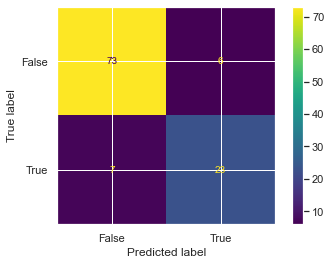

In [59]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [3]:
f=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv")

In [4]:
f.columns


Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [5]:
f.drop(["STDs: Time since first diagnosis","STDs: Time since last diagnosis"], axis = 1, inplace = True)
f.drop(["STDs:AIDS","STDs:cervical condylomatosis"],axis=1,inplace=True)

In [7]:
f.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')